# Problem 1: EU Cities Temperatures Dataset #
**Given a CSV data file as represented by the sample file EuCitiesTemperatures.csv  Download EuCitiesTemperatures.csv (213 records), load it into a Pandas DataFrame and perform the following tasks on it.**

In [826]:
#import statements
import numpy as np
import pandas as pd
from pandas import Series
from pandas import DataFrame

#### load into Pandas DataFrame

In [863]:
eu_cities = open('Assignment3/EuCitiesTemperatures.csv')
eu_citiesDF = pd.read_csv(eu_cities)
eu_citiesDF.head()

city  country  population   EU coastline  latitude  longitude  \
0    Elbasan  Albania        2.90   no       yes     41.12      20.08   
1    Andorra  Andorra        0.07   no        no     42.50       1.52   
2  Innsbruck  Austria        8.57  yes        no       NaN      11.41   
3       Graz  Austria        8.57  yes        no     47.08        NaN   
4       Linz  Austria        8.57  yes        no     48.32      14.29   

   temperature  
0        15.18  
1          NaN  
2         4.54  
3         6.91  
4         6.79

### Preprocessing/Analysis (28 pts) ###

**1.[9 pts] Fill in the missing latitude and longitude values by calculating the average for that country. Round the average to 2 decimal places.**

In [864]:
latitude_means = eu_citiesDF.groupby('country')['latitude'].transform('mean')
longitude_means = eu_citiesDF.groupby('country')['longitude'].transform('mean')
eu_citiesDF['latitude'].fillna(latitude_means.round(2),inplace=True)
eu_citiesDF['longitude'].fillna(longitude_means.round(2),inplace= True)
eu_citiesDF

city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52          NaN  
2        11.41         4.54  
3        14.02         6.91  
4        14.29         6.79  
..         ...          ...  
208      -2.94          NaN  
209      -3.53        10.14  
210      -4.23         8.00  
211      -4.25         8.60  
212      -3.95         9.73  

[213 rows x 8 columns]

**2.[9 pts] Find out the subset of cities that lie between latitudes 40 to 60 (both inclusive) and longitudes 15 to 30 (both inclusive). Find out which countries have the maximum number of cities in this geographical band. (More than one country could have the maximum number of values.)**

In [865]:
subset_df = eu_citiesDF[ (eu_citiesDF['latitude'] <= 60) & (eu_citiesDF['latitude'] >= 40) & (eu_citiesDF['longitude'] <= 30) & (eu_citiesDF['longitude'] >= 15)]
max_country = subset_df['country'].value_counts()
max_country[max_country == max_country.max()].index.tolist()

['Poland', 'Romania']

**[10 pts] Fill in the missing temperature values by the average temperature value of the similar region type. A region type would be a combinaton of whether it is in EU (yes/no) and whether it has a coastline (yes/no).
For example, if we have a missing temperature value for Bergen, Norway, which is not in the EU but lies on the coast, we will fill it with the average temperature of cities with EU='no' and coastline='yes')**

In [873]:
region_type_avg = eu_citiesDF.groupby(['EU','coastline'])['temperature'].transform('mean')
eu_citiesDF['temperature'].fillna(region_type_avg.round(2),inplace=True)
eu_citiesDF

city         country  population   EU coastline  latitude  \
0      Elbasan         Albania        2.90   no       yes     41.12   
1      Andorra         Andorra        0.07   no        no     42.50   
2    Innsbruck         Austria        8.57  yes        no     47.85   
3         Graz         Austria        8.57  yes        no     47.08   
4         Linz         Austria        8.57  yes        no     48.32   
..         ...             ...         ...  ...       ...       ...   
208  Edinburgh  United Kingdom       65.11  yes       yes     55.95   
209     Exeter  United Kingdom       65.11  yes       yes     50.70   
210  Inverness  United Kingdom       65.11  yes       yes     53.55   
211    Glasgow  United Kingdom       65.11  yes       yes     55.87   
212    Swansea  United Kingdom       65.11  yes       yes     51.63   

     longitude  temperature  
0        20.08        15.18  
1         1.52         7.48  
2        11.41         4.54  
3        14.02         6.91  
4        14.29         6.79  
..         ...          ...  
208      -2.94        10.31  
209      -3.53        10.14  
210      -4.23         8.00  
211      -4.25         8.60  
212      -3.95         9.73  

[213 rows x 8 columns]

### Visualization (27pts)

In [305]:
import matplotlib.pyplot as plt

**1.[6 pts] Plot a bar chart for the number of cities belonging to each of the regions described in Preprocessing/Analysis #3 above.**

<AxesSubplot:title={'center':'Cities Region'}, xlabel='Region: EU, coastline', ylabel='# of cities in region'>

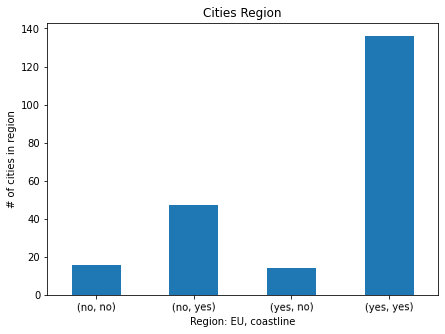

In [875]:
cities_region = eu_citiesDF.groupby(['EU','coastline'])['city'].count()
plt.figure(figsize=(7,5))
plt.title('Cities Region')
plt.ylabel('# of cities in region')
cities_region.plot(xlabel = 'Region: EU, coastline', kind = 'bar',rot = 1)

**[7 pts] Plot a scatter plot of latitude (y-axis) v/s longitude (x-axis) values to get a map-like visual of the cities under consideration. All the cities in the same country should have the same color.**

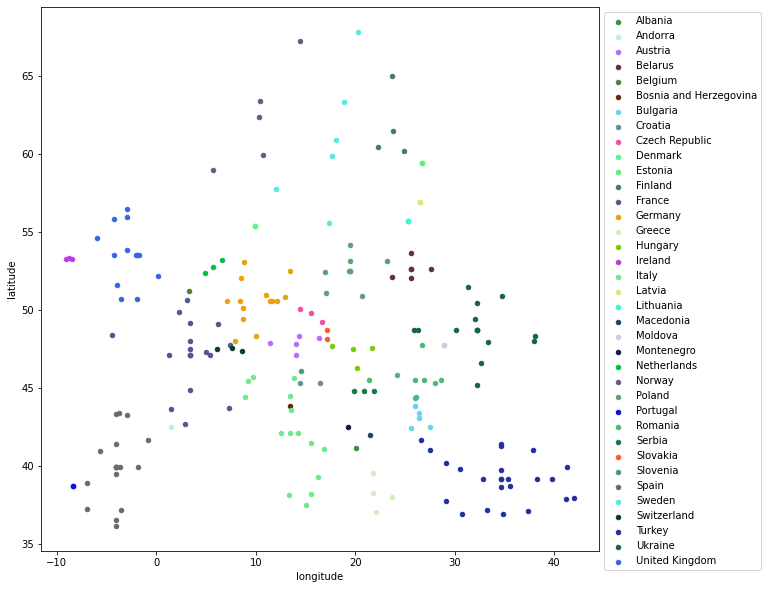

In [1027]:
from random import randint

country_cities = eu_citiesDF['country'].unique()
colors = []
n = len(country_cities)
for i in range(n):
    colors.append('#%06X' % randint(0, 0xFFFFFF))

fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)
for country,color in zip(country_cities,colors):
    df = eu_citiesDF[eu_citiesDF['country'] == country]
    df.plot('longitude','latitude', ax = ax, kind = 'scatter', color = color,label= country).legend(bbox_to_anchor=(1,1))

**[6 pts] The population column contains values unique to each country. So two cities of the same country will show the same population value. Plot a histogram of the number of countries belonging to each population group: split the population values into 5 bins (groups).**

(0.0, 30.0)

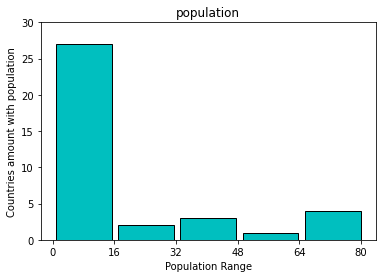

In [1048]:
bins = 5
unique_country = eu_citiesDF.groupby(['country','population']).count().reset_index()
unique_country.hist('population',bins=bins,grid = False, rwidth = 0.9, edgecolor = 'k', facecolor = 'c')
plt.xticks(range(0,82,16))
plt.ylabel('Countries amount with population')
plt.xlabel('Population Range')
plt.ylim(0,30)

**[8 pts] Plot subplots (2, 2), with proper titles, one each for the region types described in Preprocessing/Analysis #3 above.**

In [1049]:
min_temp,max_temp = eu_citiesDF['temperature'].min(),eu_citiesDF['temperature'].max()
bins = pd.IntervalIndex.from_tuples([(min_temp-1, 5.99), (6, 10), (10.01,max_temp+1)],closed = 'both')
range_tem = pd.cut(eu_citiesDF['temperature'],bins)

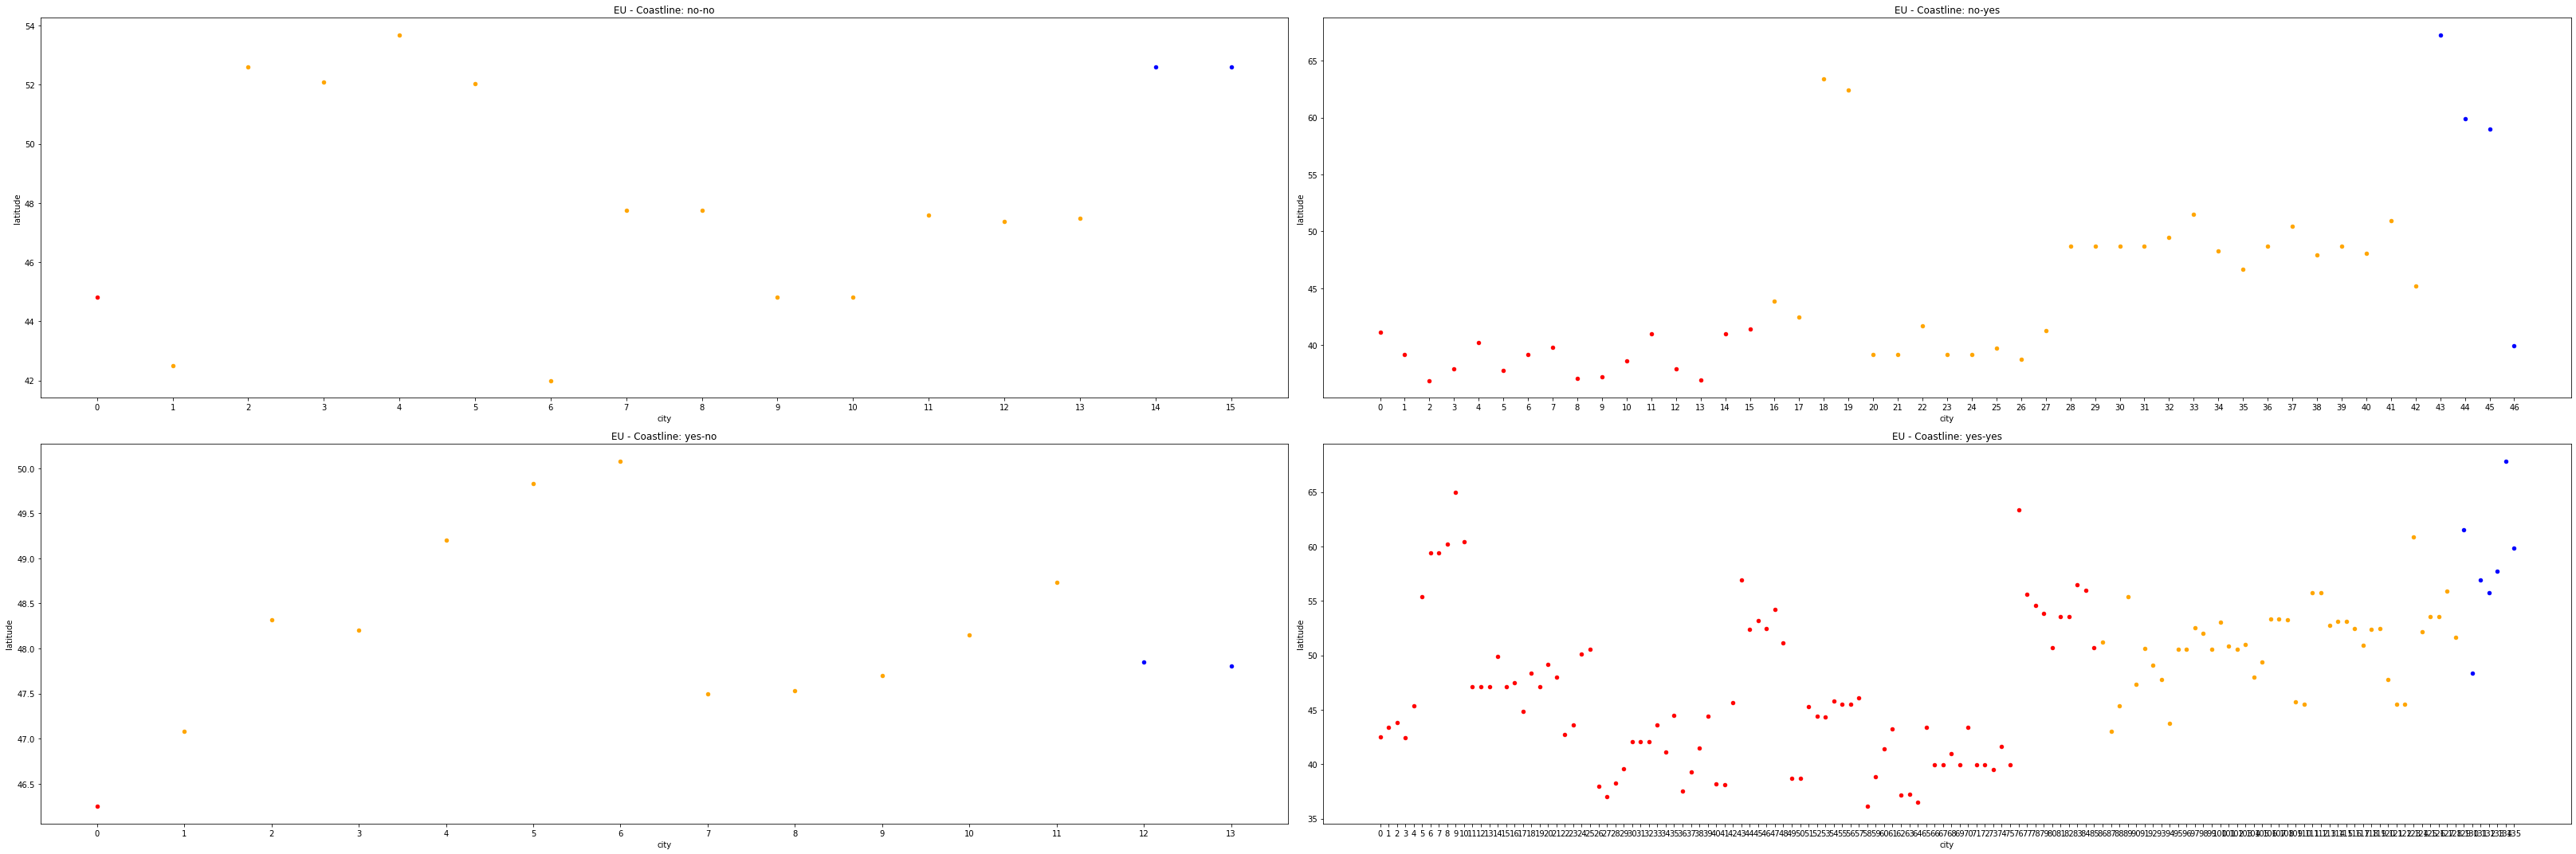

In [1052]:
colors = ['red','orange','blue']
fig,axes = plt.subplots(2,2,figsize=(45,15))
axsubs = axes.reshape(-1)
fig.set_tight_layout(True)
for x,axsub in zip([('no','no'),('no','yes'),('yes','no'),('yes','yes')],axsubs):
    temp = eu_citiesDF[(eu_citiesDF['EU'] ==x[0])  & (eu_citiesDF['coastline'] ==x[1])]
    total = np.arange(0,len(temp['city']))
    for range_t,color in zip(range_tem,colors):
        df = temp[temp['temperature'].between(range_t.left,range_t.right)]
        df.plot('city','latitude',ax=axsub,xticks=total,kind='scatter',color=color, title = "EU - Coastline: {}".format('-'.join(x)))
        axsub.set_xticks(total)
        axsub.set_xticklabels(total)

plt.show()